In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base = "/content/drive/MyDrive/auto-imports-regression-eda"
raw_csv = f"{base}/data/auto_imports1.csv"
clean_csv = f"{base}/data/auto_imports_clean.csv"

In [3]:
# --- Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# --- Load raw data ---
df = pd.read_csv(raw_csv)
print("Raw shape:", df.shape)

Raw shape: (201, 18)


In [6]:
df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
# --- Replace '?' with NaN and fix datatypes ---
df1 = df.replace('?', np.nan).copy()
for col in ['bore','stroke','horse_power','peak_rpm']:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [8]:
# --- Drop columns with heavy categorical variance ---
df2 = df1.drop(columns=['body','engine_type','cylinders'], errors='ignore')

In [9]:
# --- Drop rows with any missing values ---
df2 = df2.dropna().copy()
print("After cleaning:", df2.shape)

After cleaning: (195, 15)


In [12]:
# --- Encode categorical variable ---
df2 = pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)

In [13]:
# --- Summary statistics ---
display(df2.describe().T)

,count,mean,std,min,25%,50%,75%,max
wheel_base,195.0,98.896410,6.132038,86.60,94.50,97.00,102.40,120.90
length,195.0,174.256923,12.476443,141.10,166.30,173.20,184.05,208.10
width,195.0,65.886154,2.132484,60.30,64.05,65.40,66.90,72.00
heights,195.0,53.861538,2.396778,47.80,52.00,54.10,55.65,59.80
curb_weight,195.0,2559.000000,524.715799,1488.00,2145.00,2414.00,2943.50,4066.00
engine_size,195.0,127.938462,41.433916,61.00,98.00,120.00,145.50,326.00
bore,195.0,3.329385,0.271866,2.54,3.15,3.31,3.59,3.94
stroke,195.0,3.250308,0.314115,2.07,3.11,3.29,3.41,4.17
comprassion,195.0,10.194974,4.062109,7.00,8.50,9.00,9.40,23.00
horse_power,195.0,103.271795,37.869730,48.00,70.00,95.00,116.00,262.00


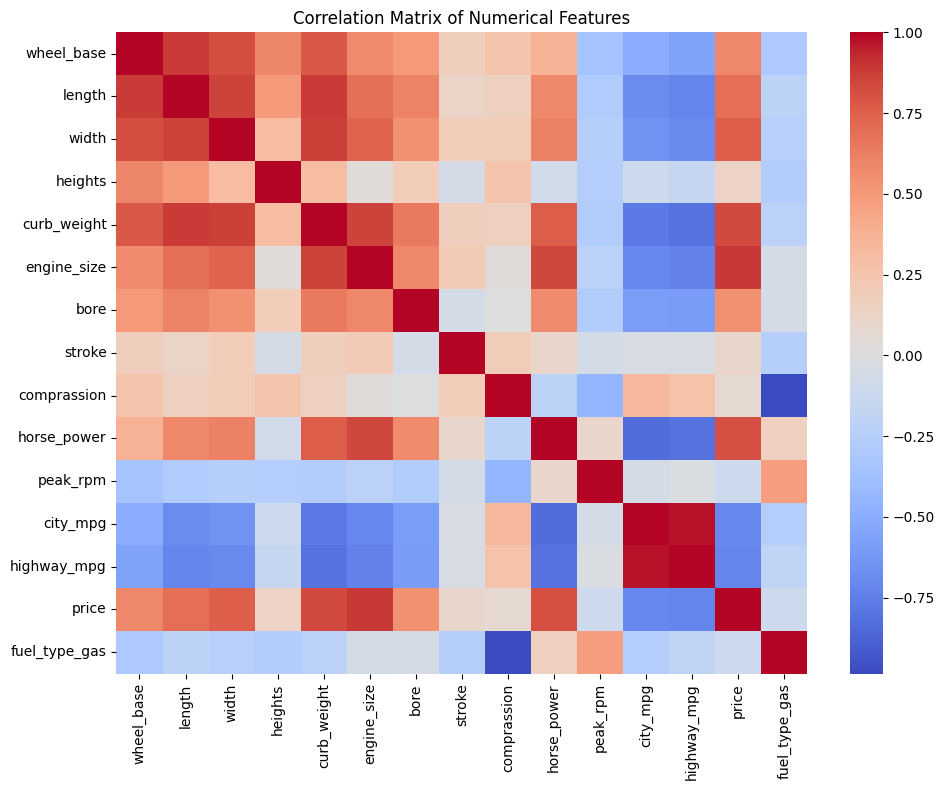

In [14]:
# --- Correlation heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [15]:
# --- Save clean dataset ---
df2.to_csv(clean_csv, index=False)
print("Saved cleaned data to:", clean_csv)

Saved cleaned data to: /content/drive/MyDrive/auto-imports-regression-eda/data/auto_imports_clean.csv


In [17]:
# --- Check for missing ---
data_types = df2.dtypes
missing_values = df2.isnull().sum()

print("Data Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)

Data Types:
wheel_base       float64
length           float64
width            float64
heights          float64
curb_weight        int64
engine_size        int64
bore             float64
stroke           float64
comprassion      float64
horse_power      float64
peak_rpm         float64
city_mpg           int64
highway_mpg        int64
price              int64
fuel_type_gas       bool
dtype: object

Missing Values:
wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64


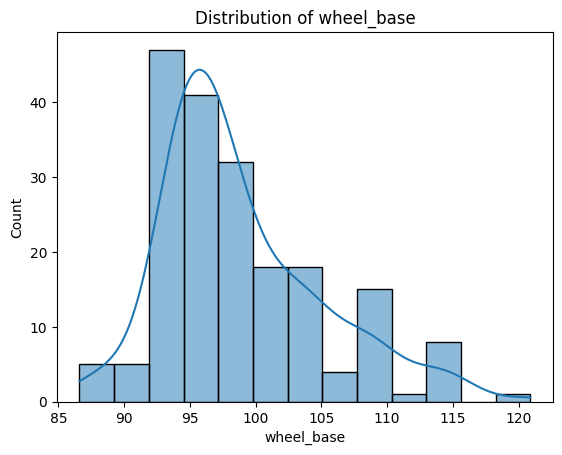

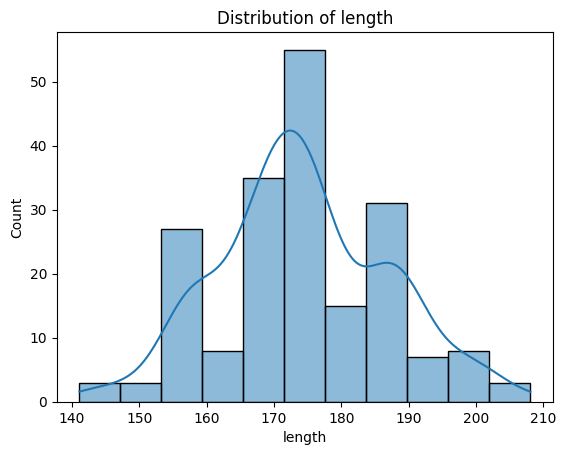

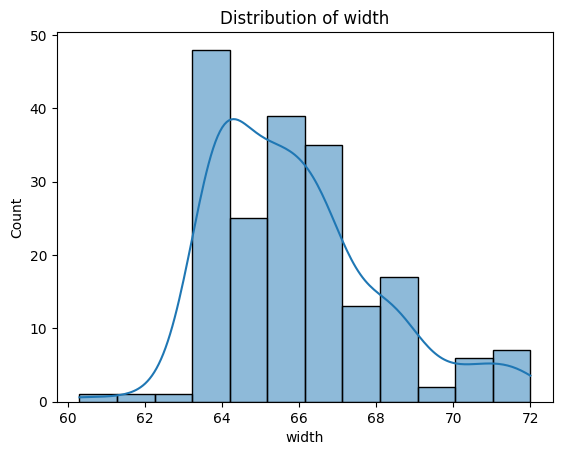

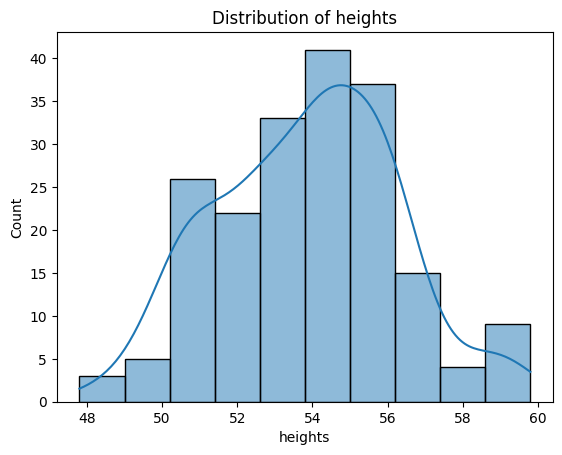

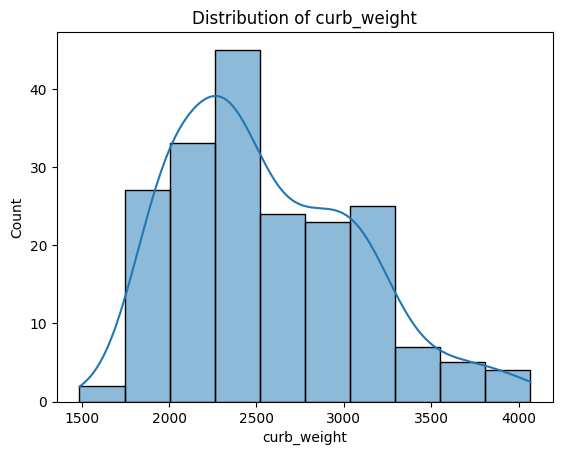

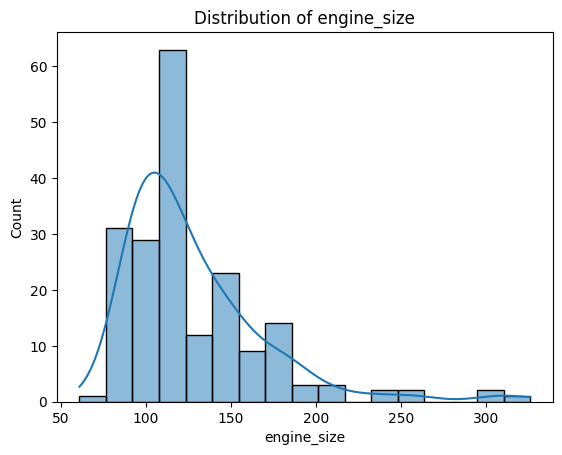

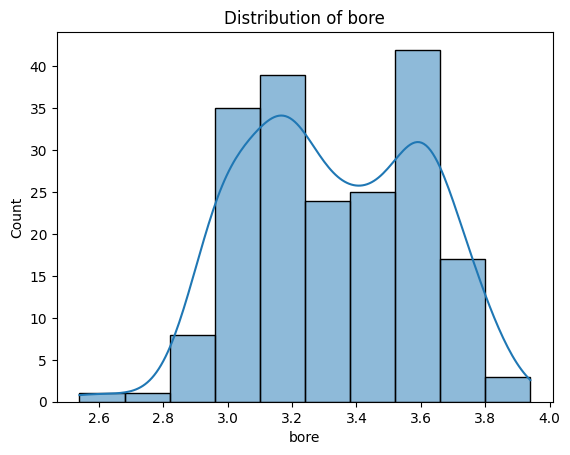

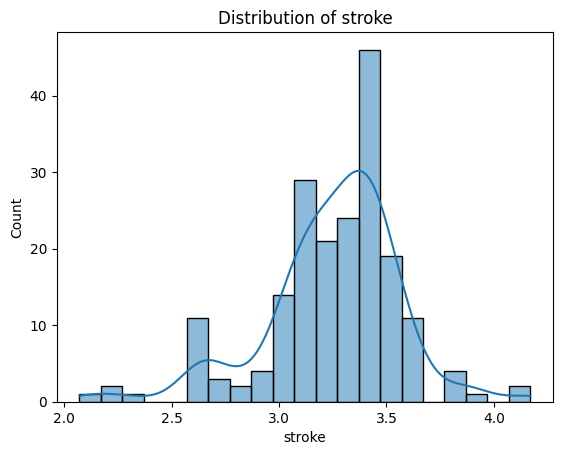

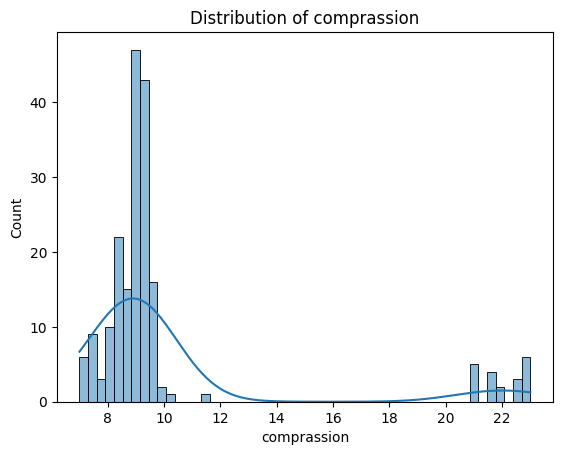

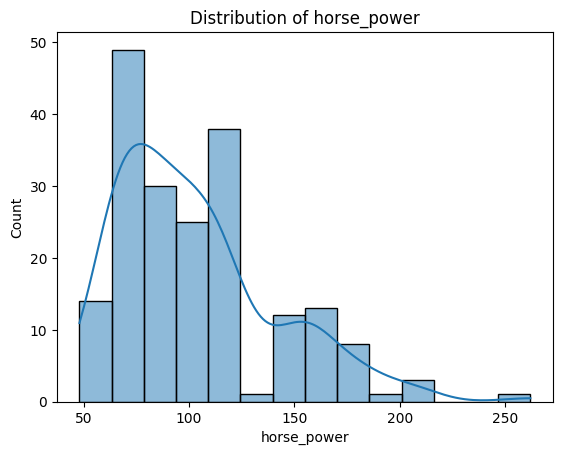

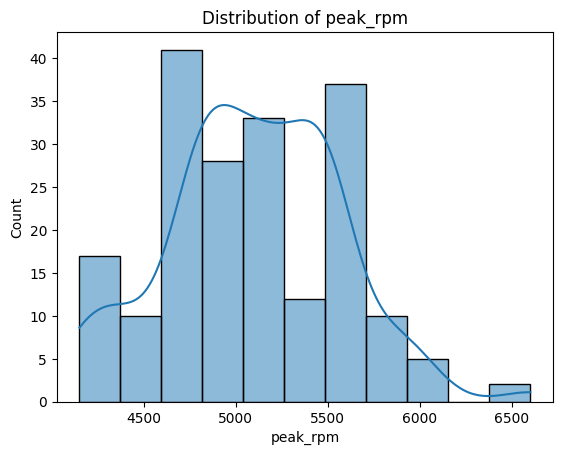

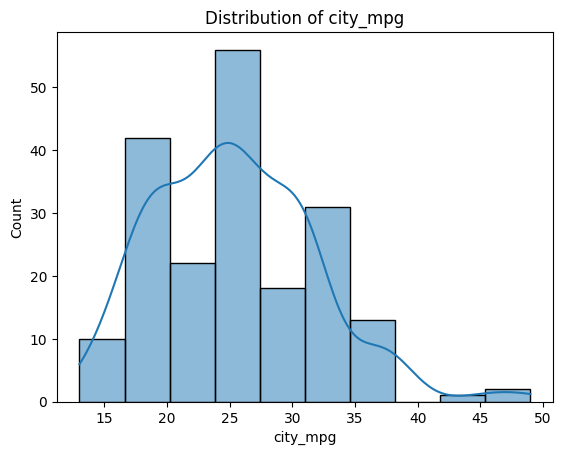

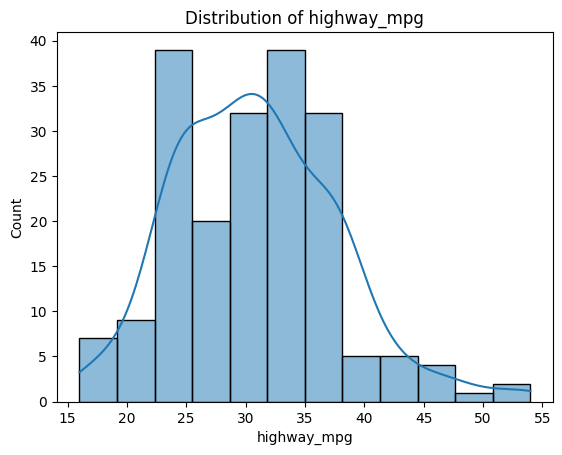

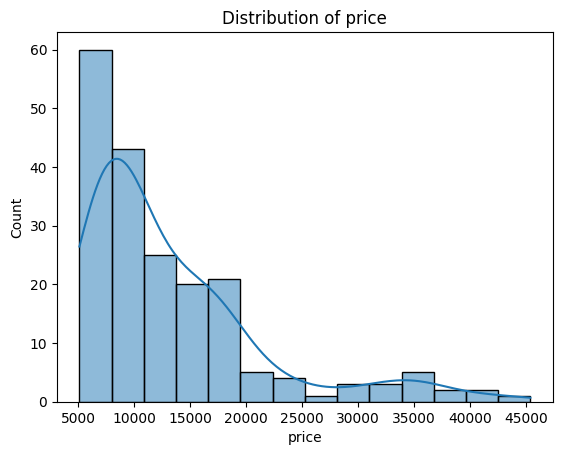

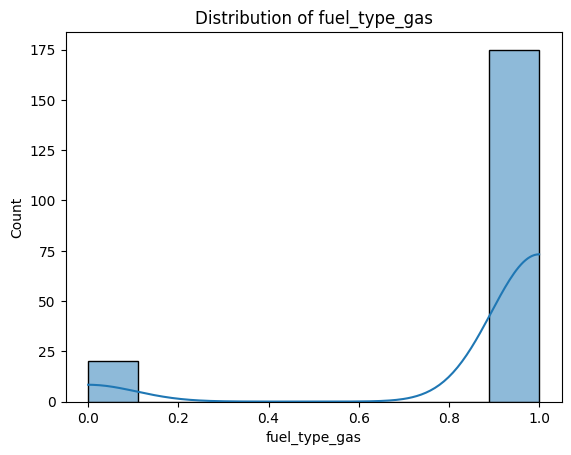

In [19]:
# --- various Distribution ----
for column in df2.columns:
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Histogram displays data frequencies within intervals, while the KDE line provides a smooth representation of the data's distribution shape


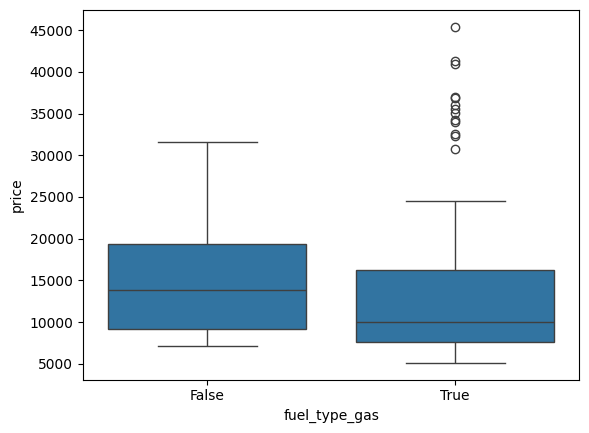

In [20]:
sns.boxplot(x='fuel_type_gas', y='price', data=df2)
plt.show()

<Axes: xlabel='engine_size', ylabel='price'>

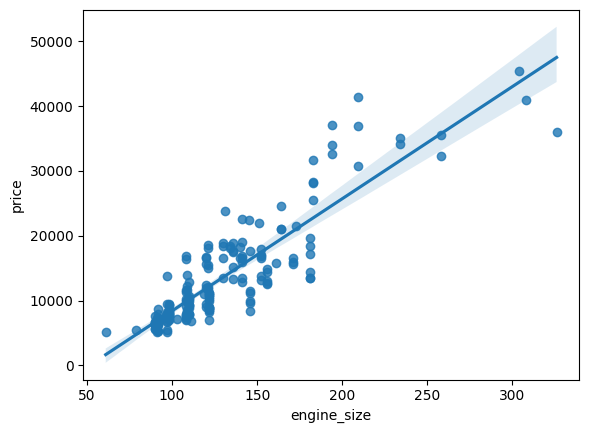

In [21]:
import seaborn as sns

sns.regplot(x="engine_size", y="price", data=df2)